In [31]:
# first download and import pandas and numpy using pip installer
import pandas as pd
import numpy as np
auction=pd.read_csv("C:/Users/Arjun/06_JN/ipl auction stats__static.csv")
#view the CSV file
auction.head()

,Unnamed: 0,SR. NO.,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,0,1,Chennai Super King,29500000,8,25
1,1,2,Delhi Capitals,1000000,7,24
2,2,3,Gujrat Titans,1500000,8,23
3,3,4,Kolkata Knight Riders,4500000,8,25
4,4,5,Lucknow Super Gaints,0,7,28


In [32]:
#Focus on the 'TOTAL PLAYERS' column for binning 
total_players = auction['TOTAL PLAYERS']
print(min(total_players))
print(max(total_players))
print(total_players.value_counts())

22
28
TOTAL PLAYERS
25    4
24    2
23    2
28    1
22    1
Name: count, dtype: int64


1. Equal Width Binning

In [34]:

# Divide total_players into bins of equal width
num_bins_equal_width = 3
#total_players_equal_width_bins = pd.cut(total_players, bins=num_bins_equal_width)
bin_labels = [ "LOW_TEAM", "AVG_TEAM","TOP_TEAM"]
total_players_equal_width_bins = pd.cut(total_players, bins=num_bins_equal_width, labels=bin_labels)


# Add the binned data to the ipl_auction dataset
auction['total_players_Equal_Width_Bins'] = total_players_equal_width_bins


# Display the binned data
print("Equal Width Bins:")
print(auction['total_players_Equal_Width_Bins'].value_counts())

Equal Width Bins:
total_players_Equal_Width_Bins
LOW_TEAM    5
AVG_TEAM    4
TOP_TEAM    1
Name: count, dtype: int64


View the dataset after modifying

In [36]:
auction

,Unnamed: 0,SR. NO.,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS,total_players_Equal_Width_Bins
0,0,1,Chennai Super King,29500000,8,25,AVG_TEAM
1,1,2,Delhi Capitals,1000000,7,24,LOW_TEAM
2,2,3,Gujrat Titans,1500000,8,23,LOW_TEAM
3,3,4,Kolkata Knight Riders,4500000,8,25,AVG_TEAM
4,4,5,Lucknow Super Gaints,0,7,28,TOP_TEAM
5,5,6,Mumbai Indians,1000000,8,25,AVG_TEAM
6,6,7,Punjab Kings,3450000,7,25,AVG_TEAM
7,7,8,Rajasthan Royals,9500000,8,24,LOW_TEAM
8,8,9,Royal Challengers Bangloro,1550000,8,22,LOW_TEAM
9,9,10,Sunrisers Hydrabad,10000000,8,23,LOW_TEAM


2. Equal Frequency Binning

In [38]:
# Divide age into bins with equal frequency
num_bins_equal_frequency = 3
total_players_equal_frequency_bins = pd.qcut(total_players, q=num_bins_equal_frequency, duplicates='drop')

auction['total_players_Equal_Frequency_Bins'] = total_players_equal_frequency_bins

print("\nEqual Frequency Bins:")
print(auction['total_players_Equal_Frequency_Bins'].value_counts())


Equal Frequency Bins:
total_players_Equal_Frequency_Bins
(21.999, 24.0]    5
(24.0, 25.0]      4
(25.0, 28.0]      1
Name: count, dtype: int64


In [39]:
auction

,Unnamed: 0,SR. NO.,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS,total_players_Equal_Width_Bins,total_players_Equal_Frequency_Bins
0,0,1,Chennai Super King,29500000,8,25,AVG_TEAM,"(24.0, 25.0]"
1,1,2,Delhi Capitals,1000000,7,24,LOW_TEAM,"(21.999, 24.0]"
2,2,3,Gujrat Titans,1500000,8,23,LOW_TEAM,"(21.999, 24.0]"
3,3,4,Kolkata Knight Riders,4500000,8,25,AVG_TEAM,"(24.0, 25.0]"
4,4,5,Lucknow Super Gaints,0,7,28,TOP_TEAM,"(25.0, 28.0]"
5,5,6,Mumbai Indians,1000000,8,25,AVG_TEAM,"(24.0, 25.0]"
6,6,7,Punjab Kings,3450000,7,25,AVG_TEAM,"(24.0, 25.0]"
7,7,8,Rajasthan Royals,9500000,8,24,LOW_TEAM,"(21.999, 24.0]"
8,8,9,Royal Challengers Bangloro,1550000,8,22,LOW_TEAM,"(21.999, 24.0]"
9,9,10,Sunrisers Hydrabad,10000000,8,23,LOW_TEAM,"(21.999, 24.0]"


In [40]:
import pandas as pd 
import numpy as np              

total_players = auction['TOTAL PLAYERS']

Q1 = np.percentile(total_players,25)
Q3 = np.percentile(total_players,75)
print(Q1)
print(Q3)

23.25
25.0


In [41]:
IQR = Q3 - Q1
print(IQR)

1.75


In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

20.625
27.625


In [43]:
for x in total_players:
    if x < lower_bound or x > upper_bound:
        print(x)

28


<Axes: ylabel='TOTAL PLAYERS'>

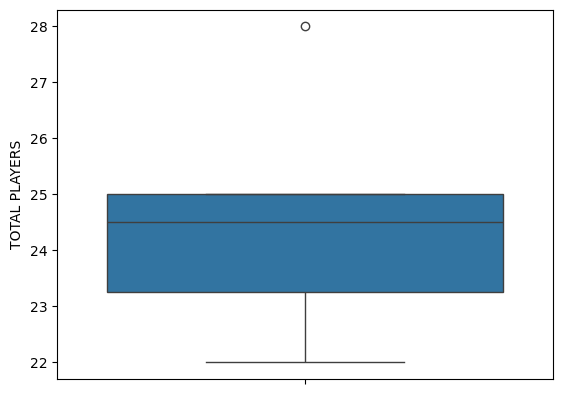

In [44]:
import seaborn as sns
sns.boxplot(total_players)

<Axes: xlabel='TOTAL PLAYERS', ylabel='Count'>

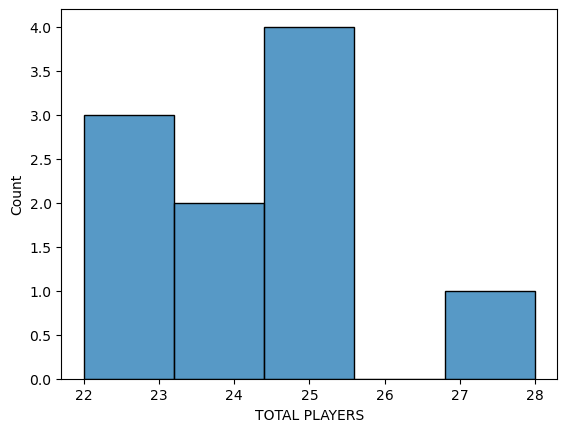

In [45]:
sns.histplot(total_players)

<Axes: xlabel='FUNDS REMAINING'>

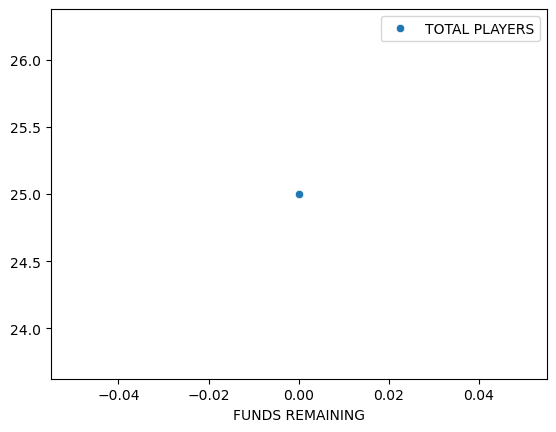

In [46]:
total_players = auction['TOTAL PLAYERS']
fund_invested =auction['FUNDS REMAINING']
df = pd.DataFrame(total_players,fund_invested)
sns.scatterplot(df)